In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data file and see what it looks like.
data_path_pima = "/Volumes/Scratch/pima/diabetes.csv"
df_pima = pd.read_csv(data_path_pima, header=0)
print(df_pima.shape)
df_pima.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for missing values.
missing_counts_pima = df_pima.isnull().sum()
print(missing_counts_pima)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Nothing missing? That's convenient. But also kind of not because we're supposed to show that we know how to clean.

In [4]:
# Get the basic statistics.
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now wait a second. There are some odd-looking min values there. And looking back at the head() we should have noticed that in SkinThickness and Insulin. So let's clear out the zeroes on some fields that should never be zero.

In [5]:
nz_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_pima[nz_cols] = df_pima[nz_cols].replace(0, np.nan)
missing_counts_pima = df_pima.isnull().sum()
print(missing_counts_pima)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


That's almost half of the records missing an Insulin value and almost 30% with no SkinThickness measurement.

In [6]:
# Get rid of the records with blanks ... which might not be the best option overall ... and see what the stats are now.
df_pima_cleaned = df_pima.dropna()
df_pima_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Lost almost half of our samples.

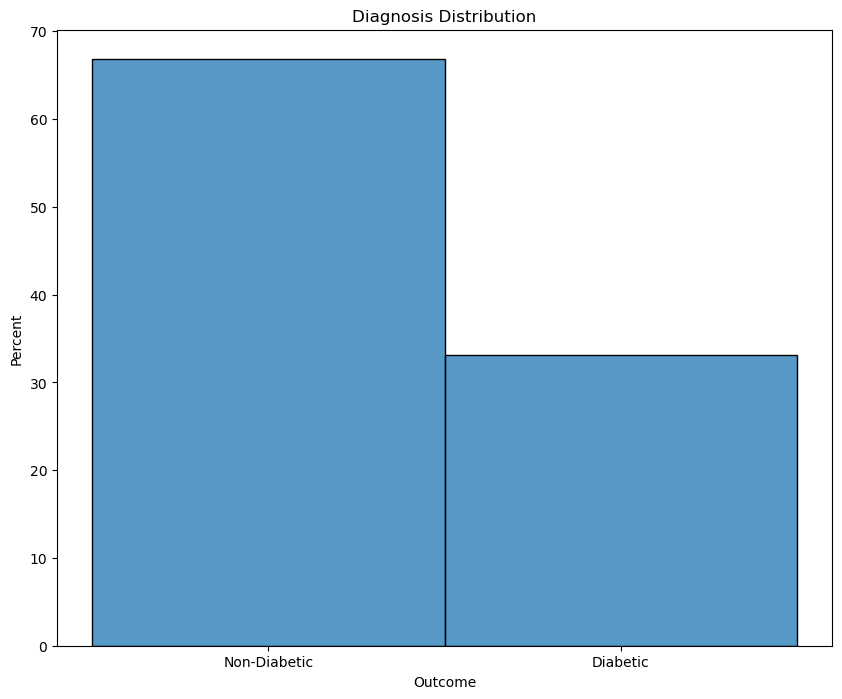

In [7]:
# Let's see what the split looks like.
plt.figure(figsize=(10, 8))
outcome_hist = sns.histplot(df_pima_cleaned, x='Outcome', discrete=True, bins=list(range(18)), stat='percent')
outcome_hist.set_title('Diagnosis Distribution')
outcome_hist.set_xticks([0, 1])
outcome_hist.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.xticks(range(2))
plt.savefig('outcome_hist.svg')
plt.show()

In [8]:
df_pima_cleaned.Outcome.value_counts(normalize=True)

Outcome
0    0.668367
1    0.331633
Name: proportion, dtype: float64

Roughly a 2:1 split.

In [9]:
# Look for any apparent dependencies or strong predictors.
df_pima_cleaned.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


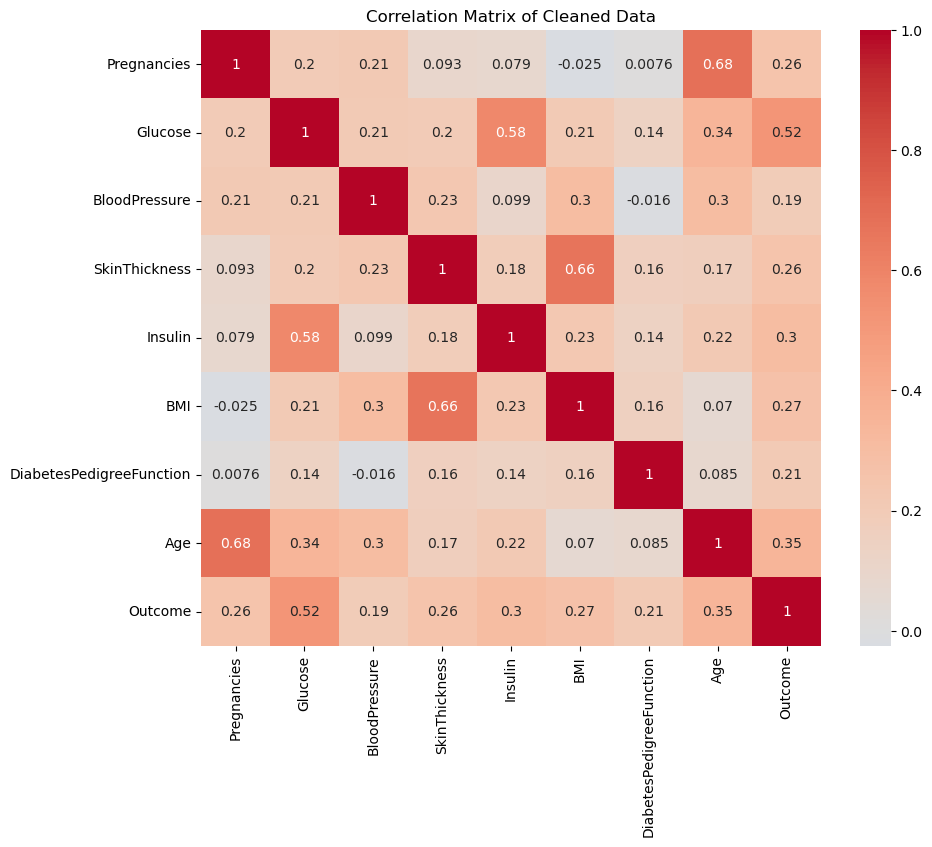

In [10]:
plt.figure(figsize=(10, 8))
corr_map = sns.heatmap(df_pima_cleaned.corr(), cmap='coolwarm', center=0, annot=True)
corr_map.set_title('Correlation Matrix of Cleaned Data')
plt.savefig('corr_map.svg')
plt.show()

So we see some interesting things here. No strong negative correlation between any of the values. The strongest link is between age and number of pregnancies which makes a certain amount of sense. If you're older you've had more time to have children. SkinThickness-BMI is almost as strong, and Glucose-Insulin is also moderately strong. Since we have the target in this map as well, we can see that the single strongest predictor is blood glucose level. I'm pleased to see that there's not a strong tie between age and the diabetes pedigree function as I had feared. Possibly surprising: The diabetes pedigree function doesn't seem to be a strong predictor on its own; it's weaker than age, in fact.

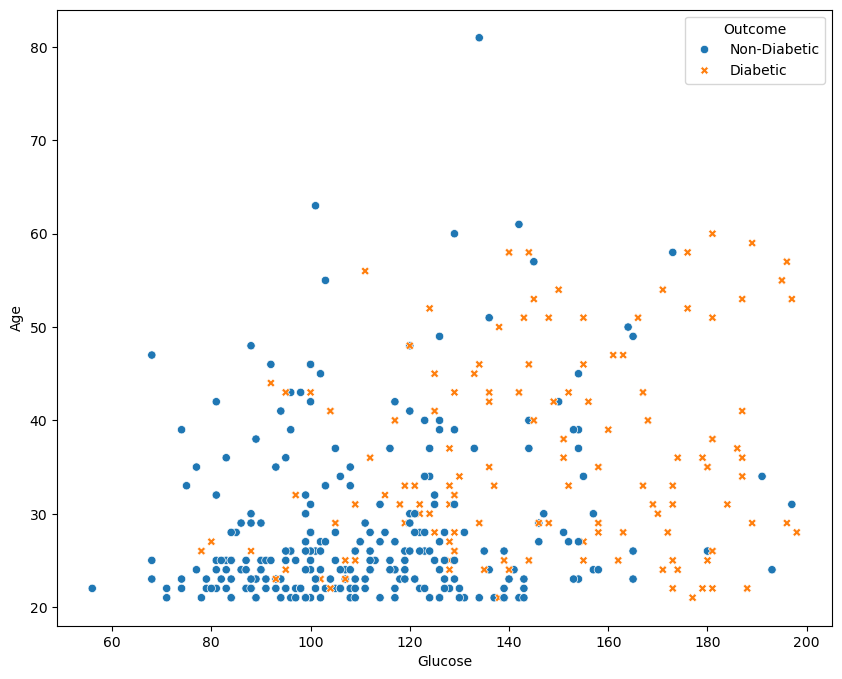

In [11]:
# Let's see how the diagnoses look against our two strongest individual predictors.
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data = df_pima_cleaned, x="Glucose", y="Age", hue="Outcome", style="Outcome")
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Non-Diabetic', 'Diabetic']
ax.legend_.remove()
ax.legend(handles, new_labels, title='Outcome')
plt.savefig('scatter.svg')
plt.show()

Let's look at some distributions...

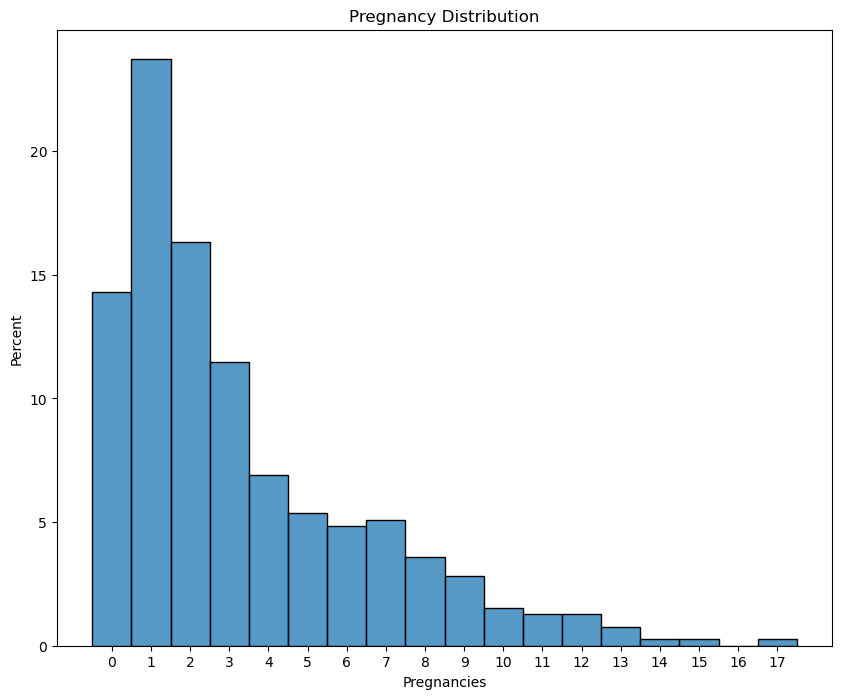

In [12]:
plt.figure(figsize=(10, 8))
preg_hist = sns.histplot(df_pima_cleaned, x='Pregnancies', discrete=True, bins=list(range(18)), stat='percent')
preg_hist.set_title('Pregnancy Distribution')
plt.xticks(range(18))
plt.savefig('preg_hist.svg')
plt.show()

It should probably be pointed out here that all of the people in the sample are female adults and thus at least abstractly capable of being pregnant.

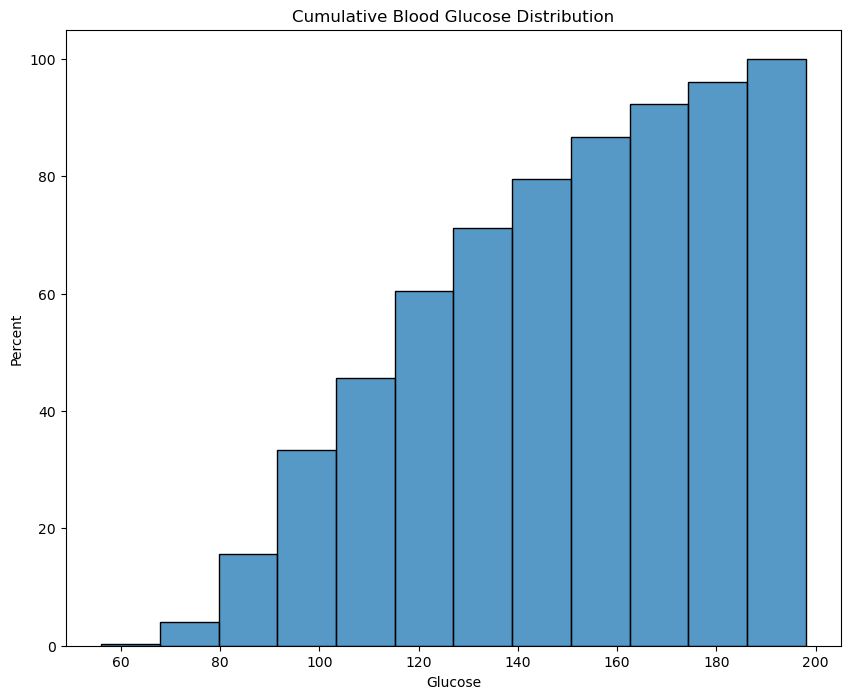

In [13]:
plt.figure(figsize=(10, 8))
gluc_hist = sns.histplot(df_pima_cleaned, x='Glucose', stat='percent', cumulative=True)
gluc_hist.set_title('Cumulative Blood Glucose Distribution')
plt.savefig('gluc_hist.svg')
plt.show()

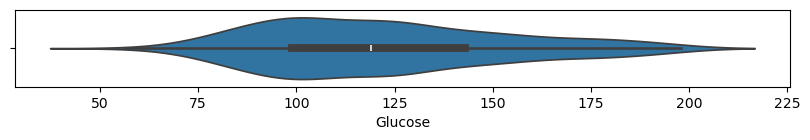

In [14]:
plt.figure(figsize=(10, 1))
gluc_box = sns.violinplot(df_pima_cleaned, x='Glucose')
plt.savefig('gluc_violin.svg')
plt.show()

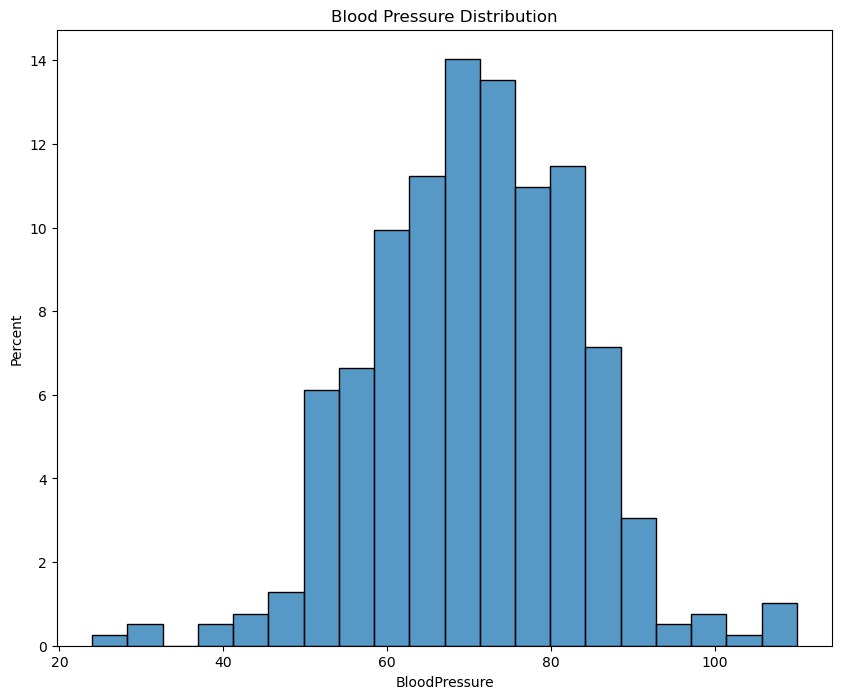

In [15]:
plt.figure(figsize=(10, 8))
bp_hist = sns.histplot(df_pima_cleaned, x='BloodPressure', stat='percent')
bp_hist.set_title('Blood Pressure Distribution')
plt.savefig('bp_hist.svg')
plt.show()

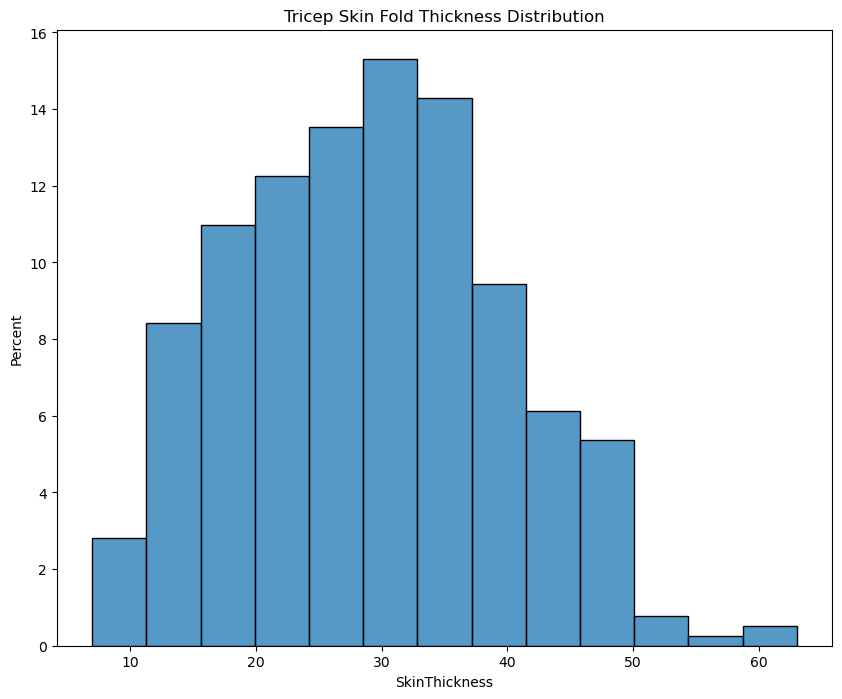

In [16]:
plt.figure(figsize=(10, 8))
thick_hist = sns.histplot(df_pima_cleaned, x='SkinThickness', stat='percent')
thick_hist.set_title('Tricep Skin Fold Thickness Distribution')
plt.savefig('thick_hist.svg')
plt.show()

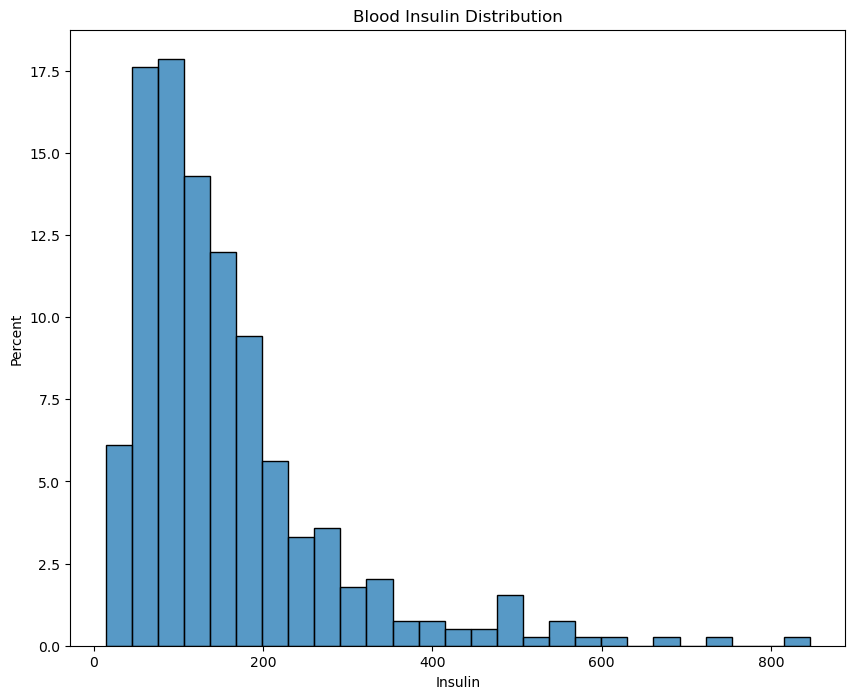

In [17]:
plt.figure(figsize=(10, 8))
ins_hist = sns.histplot(df_pima_cleaned, x='Insulin', stat='percent')
ins_hist.set_title('Blood Insulin Distribution')
plt.savefig('ins_hist.svg')
plt.show()

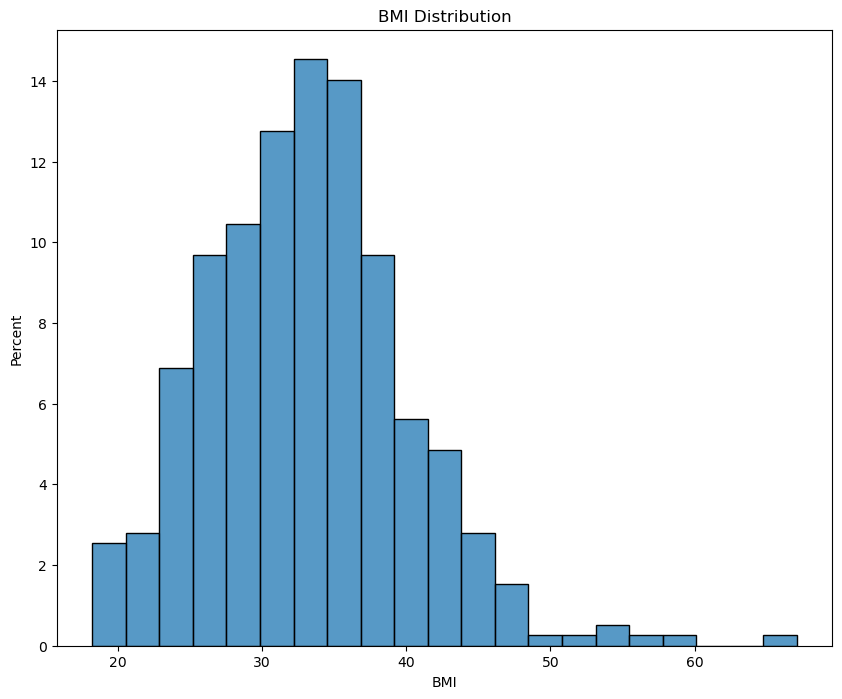

In [18]:
plt.figure(figsize=(10, 8))
bmi_hist = sns.histplot(df_pima_cleaned, x='BMI', stat='percent')
bmi_hist.set_title('BMI Distribution')
plt.savefig('bmi_hist.svg')
plt.show()

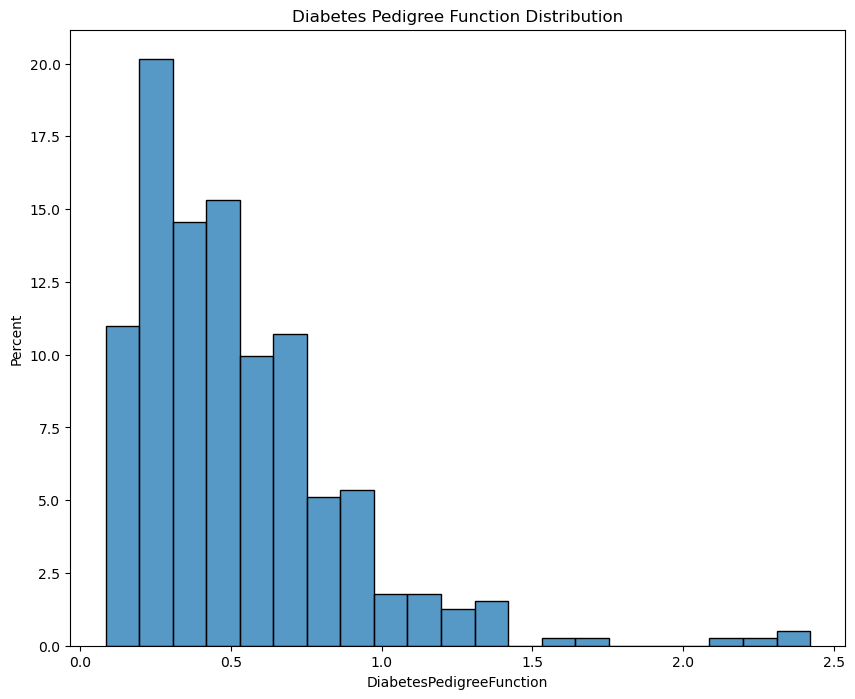

In [19]:
plt.figure(figsize=(10, 8))
dpf_hist = sns.histplot(df_pima_cleaned, x='DiabetesPedigreeFunction', stat='percent')
dpf_hist.set_title('Diabetes Pedigree Function Distribution')
plt.savefig('dpf_hist.svg')
plt.show()

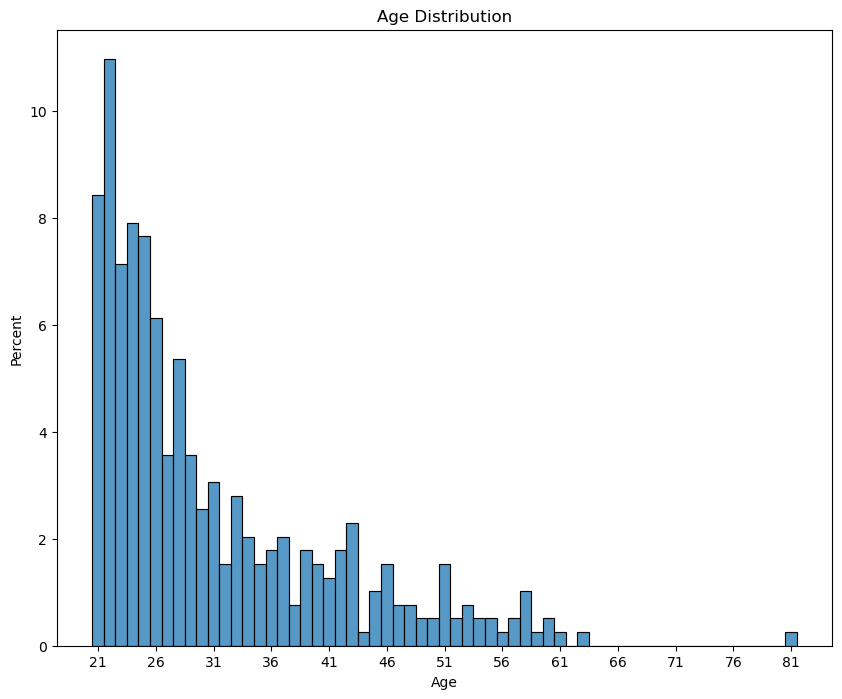

In [20]:
plt.figure(figsize=(10, 8))
age_hist = sns.histplot(df_pima_cleaned, x='Age', discrete=True, stat='percent')
age_hist.set_title('Age Distribution')
plt.xticks(range(21, 82, 5))
plt.savefig('age_hist.svg')
plt.show()